/tmp/ipykernel_606/2322782513.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="LE", y="sinuosity", data=df, palette=[custom_colors.get(le, "#7f7f7f") for le in unique_LEs])


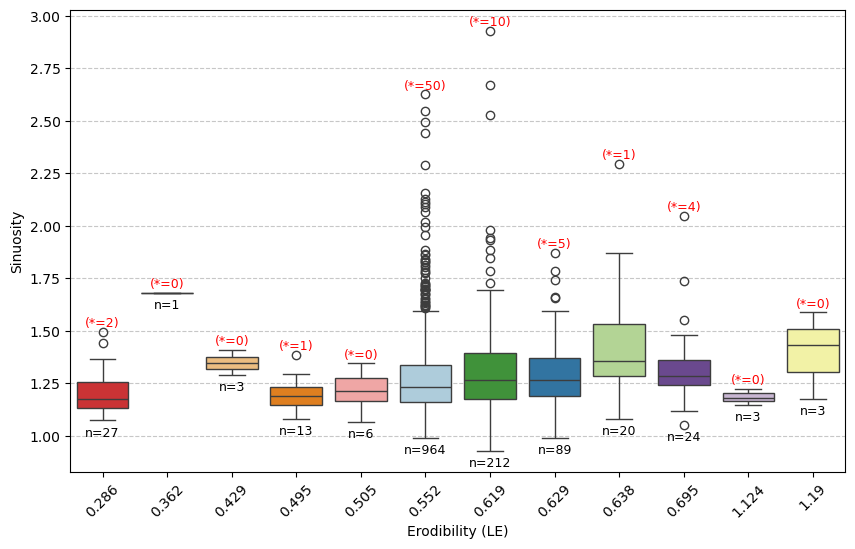

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the CSV file
file_path = 'pennines_sin_grad_le_fil.csv'
df = pd.read_csv(file_path)

# Round LE values to three decimal places
df["LE"] = df["LE"].round(3)
df = df.dropna(subset=["LE"])

# Define custom colors for each unique LE category
custom_colors = {
    0.552: "#a6cee3", 
    0.629: "#1f78b4",    
    0.638: "#b2df8a",     
    0.619: "#33a02c",      
    0.505: "#fb9a99",
    0.286: "#e31a1c",
    0.429: "#fdbf6f",
    0.495: "#ff7f00",
    1.124: "#cab2d6",
    0.695: "#6a3d9a",
    1.19: "#ffff99",
    0.362: "#b15928",
}

# Set up the figure
plt.figure(figsize=(10, 6))

# Get unique LE values
unique_LEs = sorted(df["LE"].unique())

# Create a box plot with custom colors
ax = sns.boxplot(x="LE", y="sinuosity", data=df, palette=[custom_colors.get(le, "#7f7f7f") for le in unique_LEs])

# Annotate the number of data points for each LE category
for i, le in enumerate(unique_LEs):
    n = len(df[df["LE"] == le])  # Count data points for each category
    max_y = df[df["LE"] == le]["sinuosity"].max()  # Find max y-value in this category
    
    # Annotate number of data points at the bottom
    ax.annotate(f"n={n}", 
                xy=(i, df[df["LE"] == le]["sinuosity"].min() - 0.075),  # Position annotation below the minimum value
                ha="center", fontsize=9, color="black")

    # Calculate the anomalies (outliers)
    q1 = df[df["LE"] == le]["sinuosity"].quantile(0.25)
    q3 = df[df["LE"] == le]["sinuosity"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    anomalies = df[(df["LE"] == le) & ((df["sinuosity"] < lower_bound) | (df["sinuosity"] > upper_bound))]
    num_anomalies = len(anomalies)

    # Annotate number of anomalies above the whiskers
    ax.annotate(f"(*={num_anomalies})", 
                xy=(i, max_y + 0.025),  # Position annotation above the max value
                ha="center", fontsize=9, color="red")

# Improve readability
plt.xlabel("Erodibility (LE)")
plt.ylabel("Sinuosity")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


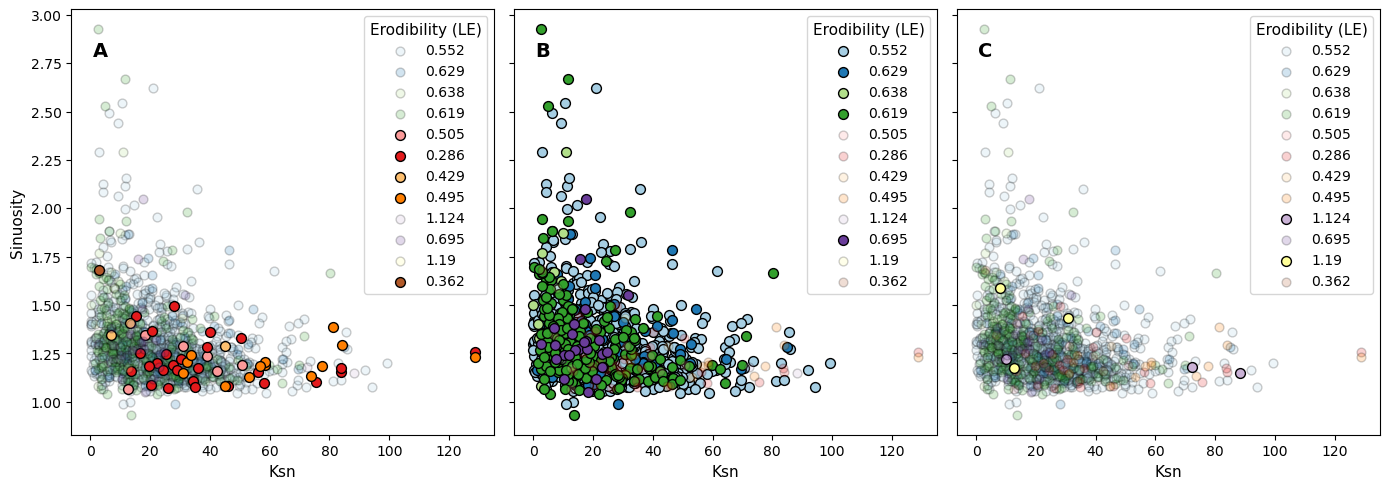

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'pennines_sin_grad_ero_fil.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN in the 'LE' column
data = data.dropna(subset=['LE'])

# Format LE to three decimal places for consistent display
data['LE'] = data['LE'].round(3)

# Define the igneous values for each graph
igneous_values_list = [
    [0.286, 0.362, 0.429, 0.495, 0.505],
    [0.552, 0.619, 0.629, 0.638, 0.695],
    [1.19, 1.124]
]

# Get unique LE values and assign colors
unique_values = data['LE'].unique()
palette = sns.color_palette('Paired', len(unique_values))  # Use a categorical palette
color_map = {val: palette[i] for i, val in enumerate(unique_values)}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

# Labels for the subplots
subplot_labels = ["A", "B", "C"]

# Loop through the igneous values for each subplot
for i, igneous_values in enumerate(igneous_values_list):
    ax = axes[i]
    
    # Set alpha and size for highlighting igneous rocks
    data['alpha'] = data['LE'].apply(lambda x: 1.0 if x in igneous_values else 0.2)  # Higher alpha for igneous rocks
    data['size'] = data['LE'].apply(lambda x: 50 if x in igneous_values else 40)  # Larger size for igneous rocks

    # Plot the scatter plot
    for val in unique_values:
        subset = data[data['LE'] == val]
        ax.scatter(
            subset['m_chi'], 
            subset['sinuosity'], 
            label=f'{val}', 
            color=color_map[val], 
            edgecolor='k', 
            alpha=subset['alpha'].iloc[0],  # Use the calculated alpha  
            s=subset['size'].iloc[0]       # Use the calculated size
        )

    # Add subplot labels (A, B, C) in the top-left corner
    ax.text(0.05, 0.925, subplot_labels[i], transform=ax.transAxes, 
            fontsize=14, fontweight='bold', va='top', ha='left')

    # Add title, labels, and legend
    ax.set_xlabel('Ksn', fontsize=11)
    if i == 0:  # Add y-axis label only to the first subplot
        ax.set_ylabel('Sinuosity', fontsize=11)
    ax.legend(
        title='Erodibility (LE)', 
        loc='upper right', 
        fontsize=10, 
        title_fontsize=11
    )
    ax.grid(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
